In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
#%matplotlib notebook

## Q1

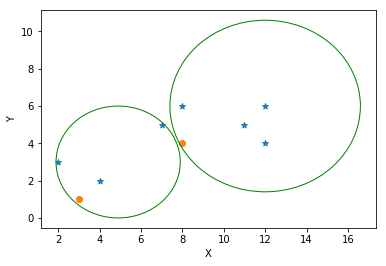

In [2]:
ax = plt.subplot()
x = np.array([[2,3,4,11,12,12,7,8,8]])
y = np.array([[3,1,2, 5, 4, 6,5,4,6]])

ux = np.array([[3,8]])
uy = np.array([[1,4]]) 

cluster1 = plt.Circle((4.9,3), 3,color="green", fill=False)
cluster2 = plt.Circle((12,6), 4.6 ,color="green", fill=False)
ax.add_patch(cluster1)
ax.add_patch(cluster2)

ax.scatter(x, y, marker='*')
ax.scatter(ux, uy, marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

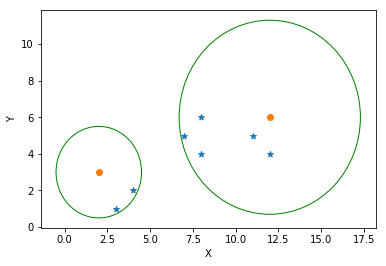

In [3]:
ax = plt.subplot()

ux1 = np.array([[2,12]])
uy1 = np.array([[3,6]]) 

cluster1 = plt.Circle((2,3), 2.5, color="green", fill=False)
cluster2 = plt.Circle((12,6), 5.3 ,color="green", fill=False)
ax.add_patch(cluster1)
ax.add_patch(cluster2)

ax.scatter(x, y, marker='*')
ax.scatter(ux1, uy1, marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

## Q2 a) Implemenation of k-means algorithm

In [4]:
x = np.array([[2,2], [3,1], [4,2], [11,5], [12,4],[12,6], [7,5],[8,4], [8,6]])

In [5]:
plt_k(x, mu)

NameError: name 'plt_k' is not defined

In [6]:
def clustering(x, k=2):
    #randomly selected k points from x as initial mu
    mu = x[random.sample(range(len(x)), k)]
    tally = 0
    dct = {}
    obj = []
    while tally < 20:        
        cluster = {}
        obj_val = 0
        for i in range(len(x)):       
            compare = x[i] - mu
            obj_val += np.linalg.norm(compare)
            d = [np.linalg.norm(thing) for thing in compare]
            #find the mu has the min distance to xi
            key = np.argmin(d)
            if key not in cluster:
                cluster[key] = []
            cluster[key].append(i)
       
        obj.append(obj_val)
        print(tally, obj_val)
        for j in range(k):
            new = np.average(x[cluster[j]], axis=0)
            if j != 0:
                mu = np.concatenate((mu, new),axis = 0)
            else:
                mu = new
        mu = mu.reshape(int(len(mu)/x.shape[1]), x.shape[1])
        dct[tally] = cluster
        tally += 1
    best = np.argmin(obj)
    worst = np.argmax(obj)
    print("The best trial is the ", best)
    print('')
    print("The worst trial is the ", worst)
    return dct, best, worst

In [9]:
def plt_k(x, cluster):
    fig, ax = plt.subplots()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(cluster)))
    for i in range(len(cluster)):
        plt.scatter(x[cluster[i]][:,0], x[cluster[i]][:,1], marker='^', c=colors[i])
        
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0 92.8747306078679
1 87.4483545401164
2 85.1204986330248
3 85.1204986330248
4 85.1204986330248
5 85.1204986330248
6 85.1204986330248
7 85.1204986330248
8 85.1204986330248
9 85.1204986330248
10 85.1204986330248
11 85.1204986330248
12 85.1204986330248
13 85.1204986330248
14 85.1204986330248
15 85.1204986330248
16 85.1204986330248
17 85.1204986330248
18 85.1204986330248
19 85.1204986330248
The best trial is the  2

The worst trial is the  0


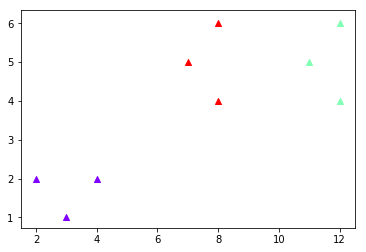

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


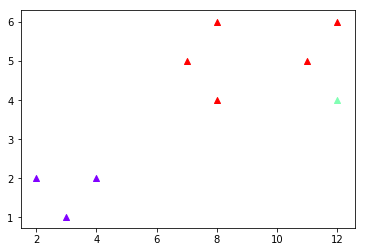

In [10]:
dc, best, worst = clustering(x, 3)
plt_k(x, dc[best])
print('')
plt_k(x, dc[worst])

## Q2 b) Partition MNIST images into K = 20 clusters

Use the k-means algorithm to partition these images into K = 20 clusters, starting with a ran- dom assignment of the vectors to groups, and repeating the experiment 20 times. For each run evaluate the k-means objective function value. Display the images of the K means #for the best run (lowest value of objective function) and for the worst run (highest value of the objective function).

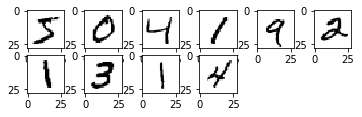

In [11]:
import scipy.io as sio
d = sio.loadmat('mnist')
X = d["trainX"]
y = d["trainY"].squeeze()

plt.figure()
for i in range(10):
    x1 = X[i, :]
    plt.subplot(5,6,i+1)
    plt.imshow(x1.reshape((28, 28)), cmap="Greys")

In [12]:
mdc, mbest, mworst = clustering(X, 20)

0 636589316.5959318
1 551495903.9074707
2 564017240.1666633
3 566449175.2953074
4 567477116.8550969
5 568412007.8990103
6 569679219.1743853
7 570734316.145178
8 571508594.5718094
9 571988803.4662093
10 572368913.3419956
11 572761288.72617
12 573100102.6822904
13 573471290.2637899
14 573746313.882584
15 574019766.8309443
16 574222382.0084567
17 574350135.7803783
18 574432342.0095477
19 574500221.6029255
The best trial is the  1

The worst trial is the  0


In [128]:
def plt_cluster(x, dct, para, i):
    plt.figure()
    subset = dct[para][i][:30]
    x = x[subset, :]
    for j in range(30):         
        x1 = x[j,:]
        plt.subplot(5, 6, j+1)
        plt.imshow(x1.reshape((28, 28)), cmap="Greys")

In [18]:
total = 0
for i in range(20):
    total += len(mdc[best][i])
print(total/20)

3000.0


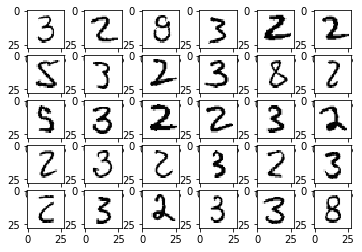

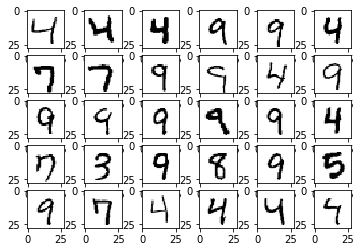

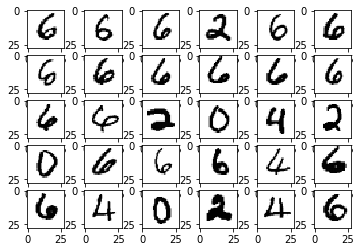

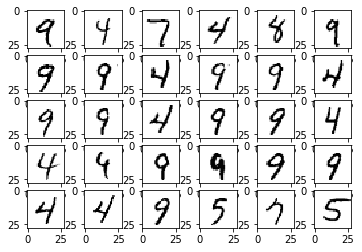

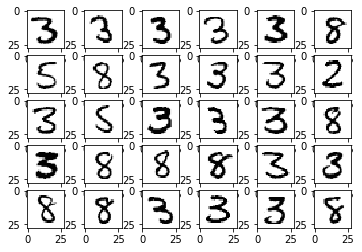

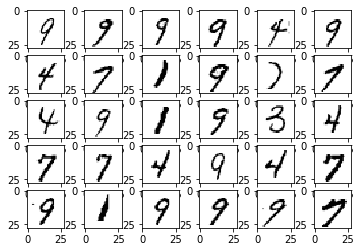

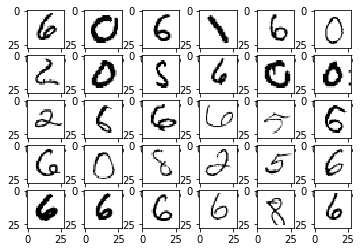

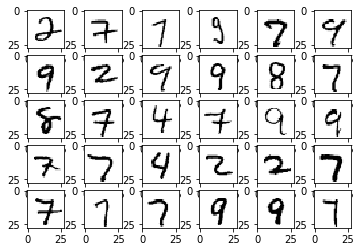

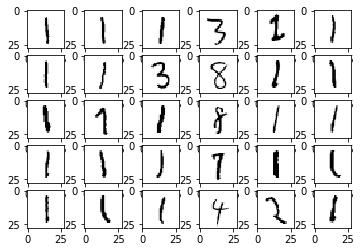

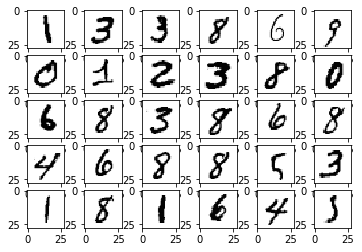

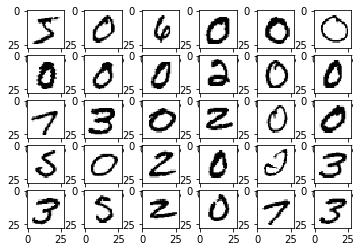

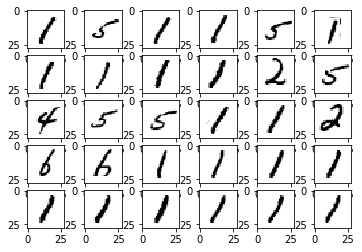

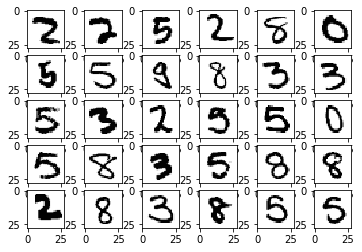

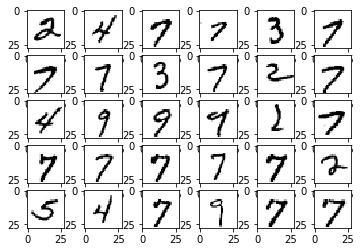

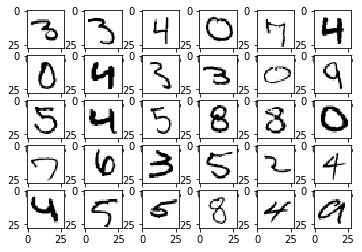

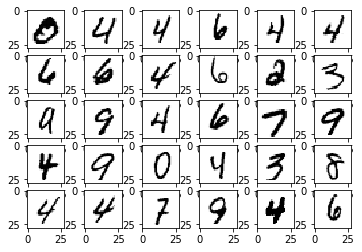

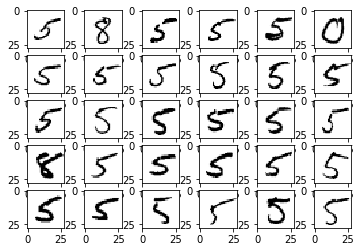

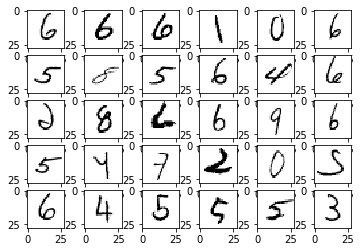

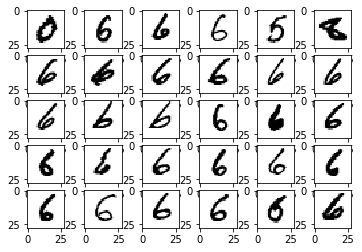

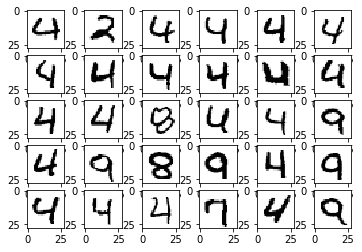

In [131]:
#Display the images of the K means #for the best run (lowest value of objective function)
for i in range(20):
    plt_cluster(X, mdc, best, i)

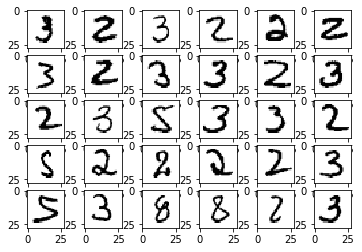

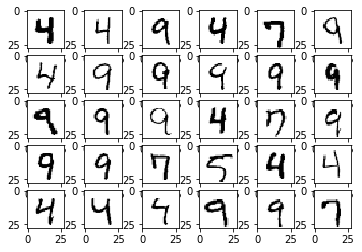

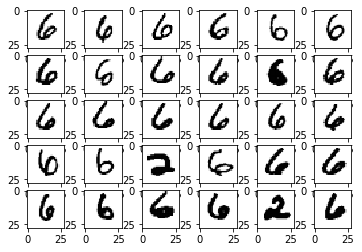

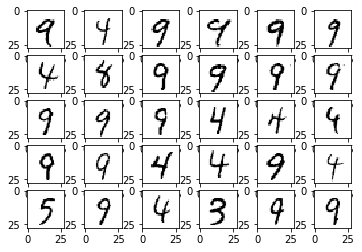

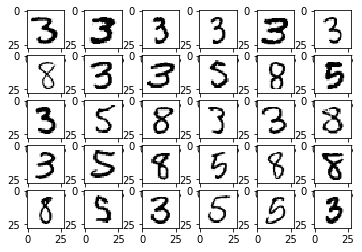

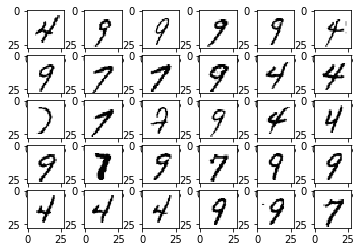

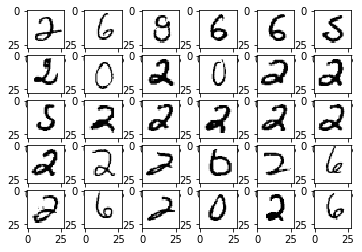

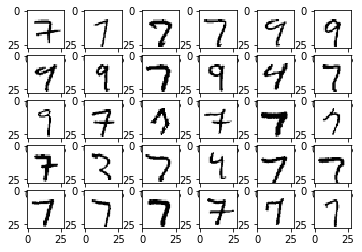

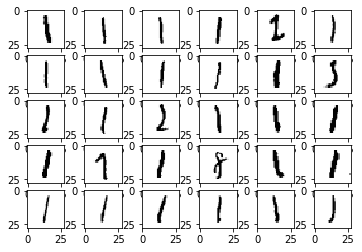

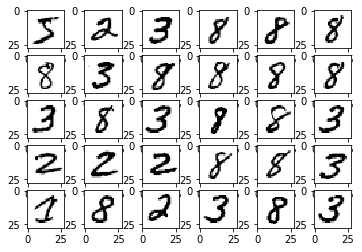

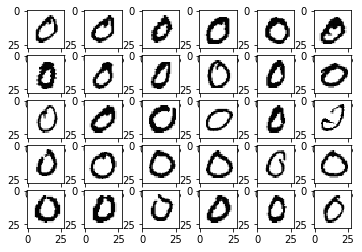

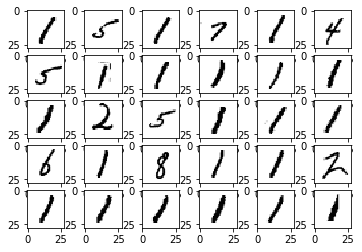

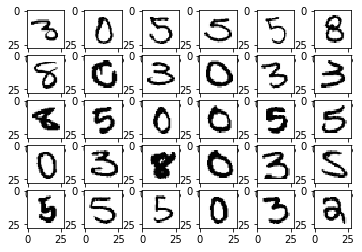

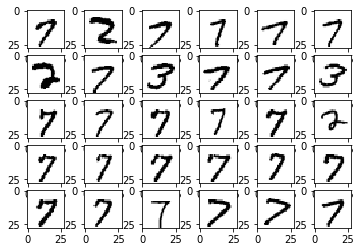

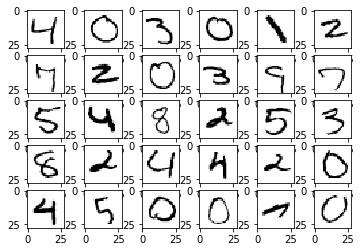

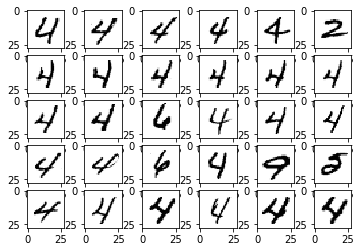

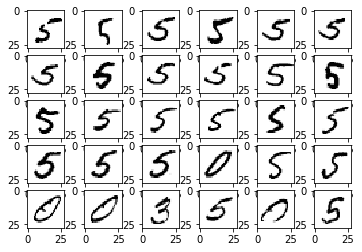

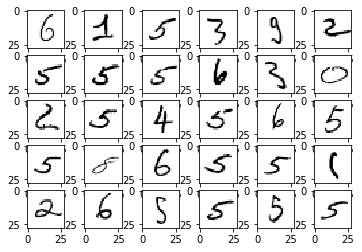

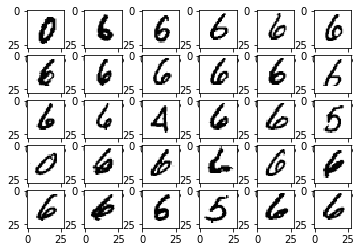

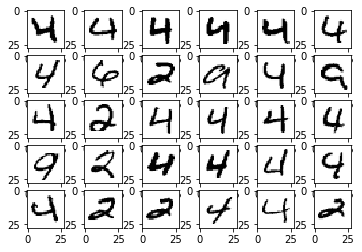

In [132]:
#Display the images of the K means #for the worst run (highest value of objective function)
for i in range(20):
    plt_cluster(X, mdc, worst, i)

In [17]:
X.shape

(60000, 784)